In [61]:
import os
print(os.path.abspath('.'))

E:\Jupyter_notebook


## 第1步：导入数据分析库pandas，数据可视化库matplotlib
 `%matplotlib inline`是Ipython的魔法函数，其作用是使matplotlib绘制的图像嵌入在juptyer notebook的单元格里

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 第2步：导入数据集，查看数据集

In [63]:
dataset = pd.read_csv('./studentscores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [64]:
dataset.shape

(25, 2)

In [65]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [67]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 第3步：提取特征
### 提取特征：学习时间 提取标签：学习成绩

In [68]:
feature_columns = ['Hours']
label_column = ['Scores']

In [69]:
features = dataset[feature_columns]
label = dataset[label_column]

In [70]:
features.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [71]:
label.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [72]:
type(features)

pandas.core.frame.DataFrame

In [73]:
X = features.values

In [74]:
Y = label.values

In [75]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [76]:
X.shape

(25, 1)

## 第四步：建立模型
### 拆分数据，四分之三的数据作为训练集，四分之一的数据作为测试集

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

### 用训练集的数据进行训练

In [78]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

### 对测试集进行预测

In [79]:
Y_pred = regressor.predict(X_test)

In [80]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [81]:
Y_pred

array([[16.84472176],
       [33.74557494],
       [75.50062397],
       [26.7864001 ],
       [60.58810646],
       [39.71058194],
       [20.8213931 ]])

## 可视化

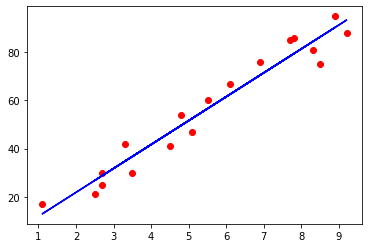

In [82]:
# 散点图：红色点表示训练集的点
plt.scatter(X_train , Y_train, color = 'red')
# 线图：蓝色线表示由训练集训练出的线性回归模型
plt.plot(X_train , regressor.predict(X_train), color ='blue')
plt.show()

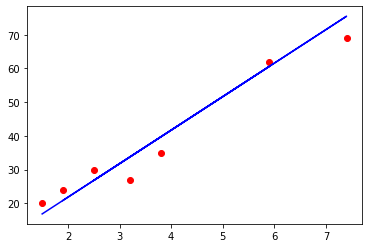

In [84]:
# 散点图：红色点表示测试集的点
plt.scatter(X_test , Y_test, color = 'red')
# 线图：蓝色线表示对测试集进行预测的结果
plt.plot(X_test , regressor.predict(X_test), color ='blue')
plt.show()